# DS-503: ANÁLISIS EXPLORATORIO DE DATOS (EDA) Y CORRELACIONES

---

## 🎯 Objetivos

1. Análisis estadístico descriptivo de todas las variables
2. Identificar correlaciones entre features y churn
3. Análisis geográfico detallado (Borough, MedianIncome)
4. Análisis de servicios y su impacto en churn
5. Detección de outliers
6. Identificar top features para el modelo
7. Generar insights accionables

---

## 📥 Input
- `data/processed/02_dataset_enriched_nyc.csv` (7,043 × 30 columnas)

## 📤 Output
- Múltiples visualizaciones en `reports/figures/`
- Insights documentados para feature engineering

---

## 1. Imports y Configuración

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Tamaño de figuras
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Datos Enriquecidos

In [83]:
# Cargar dataset enriquecido de DS-502
df = pd.read_csv('../data/processed/02_dataset_enriched_nyc.csv')

print(f"✓ Dataset cargado: {df.shape}")
print(f"\nColumnas ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nPrimeras 3 filas:")
df.head(3)

✓ Dataset cargado: (7043, 30)

Columnas (30):
   1. CustomerID
   2. City
   3. State
   4. Borough
   5. ZipCode
   6. Latitude
   7. Longitude
   8. MedianIncome
   9. PopulationDensity
  10. RegistrationDate
  11. Gender
  12. SeniorCitizen
  13. Partner
  14. Dependents
  15. Tenure
  16. PhoneService
  17. MultipleLines
  18. InternetService
  19. OnlineSecurity
  20. OnlineBackup
  21. DeviceProtection
  22. TechSupport
  23. StreamingTV
  24. StreamingMovies
  25. Contract
  26. PaperlessBilling
  27. PaymentMethod
  28. ChargesMonthly
  29. ChargesTotal
  30. Churn

Primeras 3 filas:


,CustomerID,City,State,Borough,ZipCode,Latitude,Longitude,MedianIncome,PopulationDensity,RegistrationDate,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Churn
0,0002-ORFBO,New York,NY,STATEN ISLAND,10310,40.6452,-74.1082,82200,8618,2023-11-30,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6000,593.3000,No
1,0003-MKNFE,New York,NY,BRONX,10467,40.8767,-73.8803,40500,34920,2021-08-05,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9000,542.4000,No
2,0004-TLHLJ,New York,NY,QUEENS,11105,40.7719,-73.9094,69300,21460,2021-11-25,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9000,280.8500,Yes


## 3. Información General del Dataset

In [84]:
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

print(f"\n📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

print(f"\n📋 Tipos de datos:")
print(df.dtypes.value_counts())

print(f"\n💾 Uso de memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🎯 Variable objetivo (Churn):")
churn_counts = df['Churn'].value_counts()
for val, count in churn_counts.items():
    pct = count / len(df) * 100
    print(f"   {val}: {count:,} ({pct:.2f}%)")

INFORMACIÓN GENERAL DEL DATASET

📊 Dimensiones: 7,043 filas × 30 columnas

📋 Tipos de datos:
object     22
float64     4
int64       4
Name: count, dtype: int64

💾 Uso de memoria: 8.59 MB

🎯 Variable objetivo (Churn):
   No: 5,174 (73.46%)
   Yes: 1,869 (26.54%)


## 4. Análisis Estadístico de Variables Numéricas

In [85]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)

print(f"\nTotal de variables numéricas: {len(numeric_cols)}\n")

# Estadísticas completas
stats_df = df[numeric_cols].describe().T
stats_df['missing'] = df[numeric_cols].isnull().sum()
stats_df['missing_pct'] = (stats_df['missing'] / len(df) * 100).round(2)

print(stats_df)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

Total de variables numéricas: 8

                      count       mean        std        min        25%  \
Latitude          7043.0000    40.7138     0.0880    40.5002    40.6401   
Longitude         7043.0000   -73.9473     0.1059   -74.2531   -73.9937   
MedianIncome      7043.0000 69270.4876 14687.3646 40500.0000 62800.0000   
PopulationDensity 7043.0000 35860.9852 21999.5850  8618.0000 21460.0000   
SeniorCitizen     7043.0000     0.1621     0.3686     0.0000     0.0000   
Tenure            7043.0000    32.3711    24.5595     0.0000     9.0000   
ChargesMonthly    7043.0000    64.7617    30.0900    18.2500    35.5000   
ChargesTotal      7032.0000  2283.3004  2266.7714    18.8000   401.4500   

                         50%        75%        max  missing  missing_pct  
Latitude             40.7157    40.7670    40.9121        0       0.0000  
Longitude           -73.9407   -73.8790   -73.7036        0       0.0000  
MedianIncome     

## 5. Distribución de Variables Numéricas

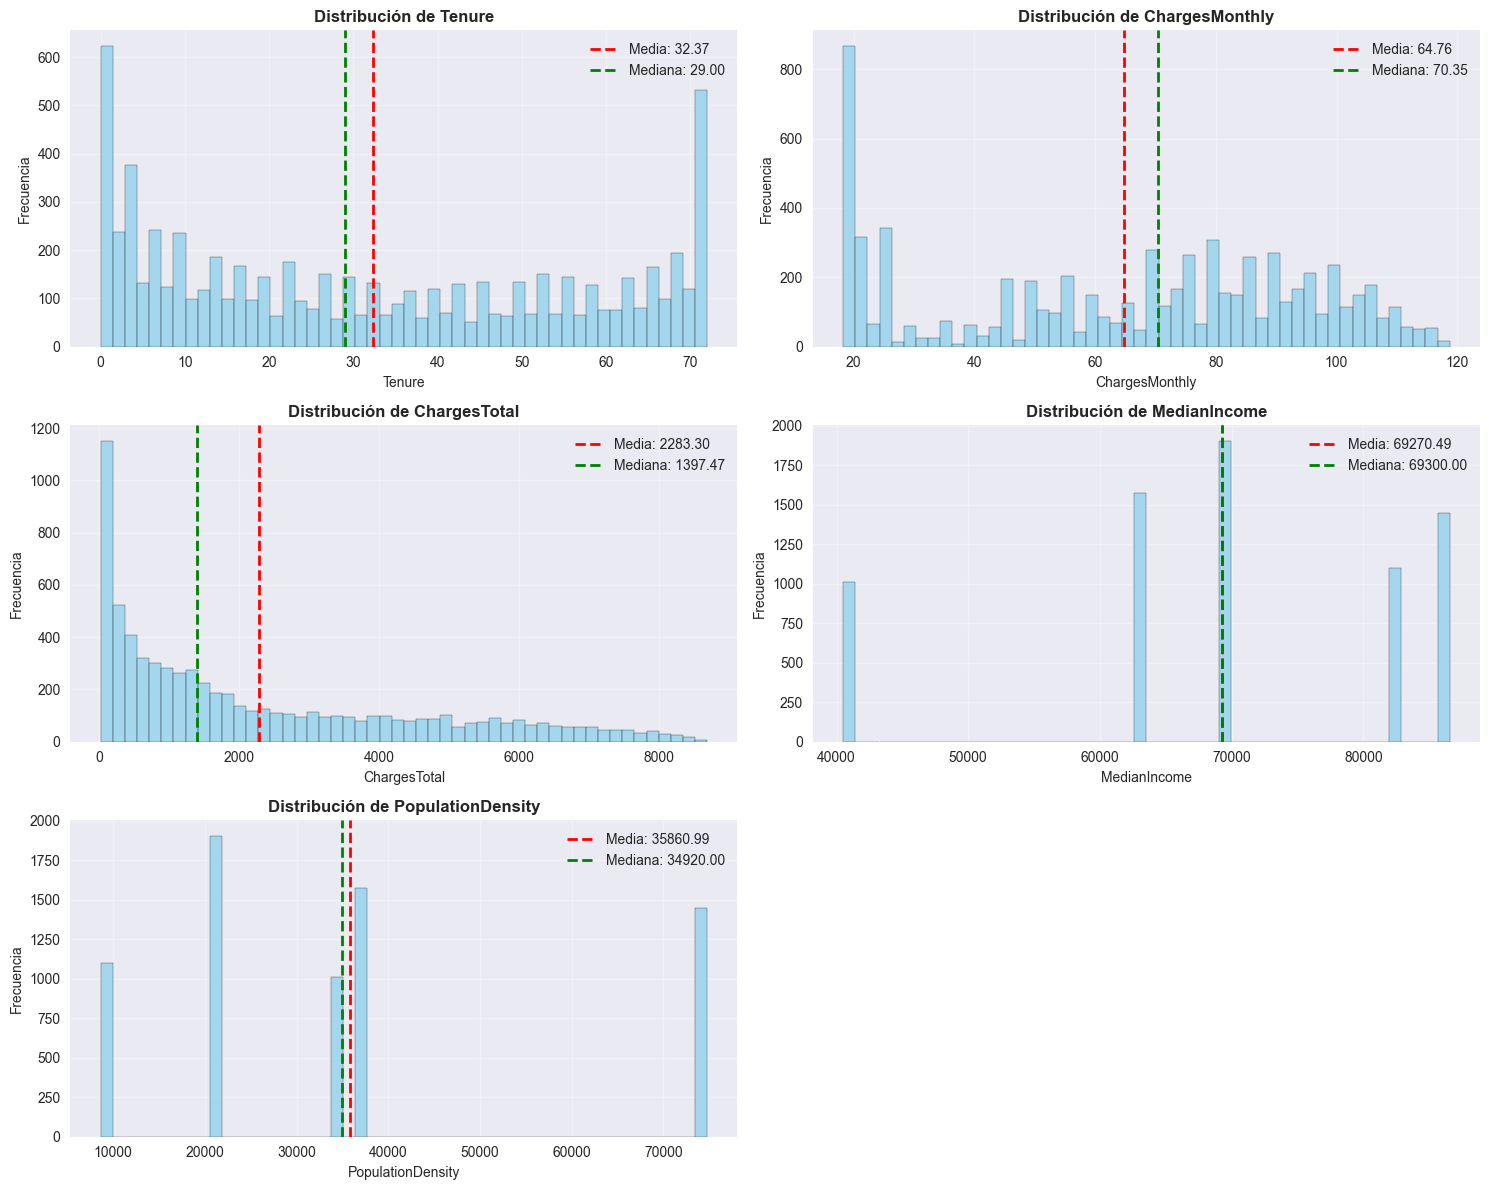

💾 Gráfico guardado: reports/figures/03_numeric_distributions.png


In [86]:
# Variables clave para visualizar
key_numeric = ['Tenure', 'ChargesMonthly', 'ChargesTotal', 'MedianIncome', 'PopulationDensity']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(key_numeric):
    # Histograma con KDE
    axes[idx].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(alpha=0.3)
    
    # Agregar estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    axes[idx].legend()

# Eliminar subplot vacío
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../reports/figures/03_numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/03_numeric_distributions.png")

## 6. Análisis de Variables Categóricas

In [87]:
# Seleccionar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Excluir ID y fecha
categorical_cols = [col for col in categorical_cols if col not in ['CustomerID', 'RegistrationDate']]

print("=" * 80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 80)

print(f"\nTotal de variables categóricas: {len(categorical_cols)}\n")

for col in categorical_cols[:15]:  # Mostrar primeras 15
    unique_count = df[col].nunique()
    print(f"\n{col} ({unique_count} valores únicos):")
    
    value_counts = df[col].value_counts()
    for val, count in value_counts.head(5).items():
        pct = count / len(df) * 100
        bar = "█" * int(pct / 2)
        print(f"   {str(val):30s}: {count:5,} ({pct:5.2f}%) {bar}")

ANÁLISIS DE VARIABLES CATEGÓRICAS

Total de variables categóricas: 20


City (1 valores únicos):
   New York                      : 7,043 (100.00%) ██████████████████████████████████████████████████

State (1 valores únicos):
   NY                            : 7,043 (100.00%) ██████████████████████████████████████████████████

Borough (5 valores únicos):
   QUEENS                        : 1,908 (27.09%) █████████████
   BROOKLYN                      : 1,577 (22.39%) ███████████
   MANHATTAN                     : 1,448 (20.56%) ██████████
   STATEN ISLAND                 : 1,099 (15.60%) ███████
   BRONX                         : 1,011 (14.35%) ███████

ZipCode (197 valores únicos):
   10314                         :   191 ( 2.71%) █
   10306                         :   113 ( 1.60%) 
   10305                         :   111 ( 1.58%) 
   11385                         :   101 ( 1.43%) 
   11368                         :   101 ( 1.43%) 

Gender (2 valores únicos):
   Male                  

In [88]:
# Crear variable numérica de churn para correlación
df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

# Guardar variable para análisis posteriores
churn_correlations = df[['Churn_Binary']].copy()  # Placeholder para análisis completo en sección 7.2

print("✓ Variable Churn_Binary creada")

✓ Variable Churn_Binary creada


## 7. Análisis de Multicolinealidad (VIF - Variance Inflation Factor)

ANÁLISIS DE MULTICOLINEALIDAD - VIF (Variance Inflation Factor)

📊 ¿Qué es VIF?
   VIF mide cuánta redundancia tiene una variable con respecto a las demás.
   Indica qué tan bien puede predecirse una variable usando las otras.

   Interpretación:
   • VIF = 1      → Sin correlación con otras variables
   • VIF = 1-5    → ✅ Baja multicolinealidad (aceptable)
   • VIF = 5-10   → ⚠️  Multicolinealidad moderada (revisar)
   • VIF > 10     → 🔴 Alta multicolinealidad (eliminar variable)


🔧 Calculando VIF para 8 variables numéricas...

RESULTADOS VIF:
--------------------------------------------------------------------------------
Longitude            | VIF: 180556.74 | 🔴 Alta          | Acción: Revisar/Eliminar
Latitude             | VIF: 178171.65 | 🔴 Alta          | Acción: Revisar/Eliminar
MedianIncome         | VIF:    42.62 | 🔴 Alta          | Acción: Revisar/Eliminar
ChargesTotal         | VIF:    19.28 | 🔴 Alta          | Acción: Revisar/Eliminar
ChargesMonthly       | VIF:    18.98 

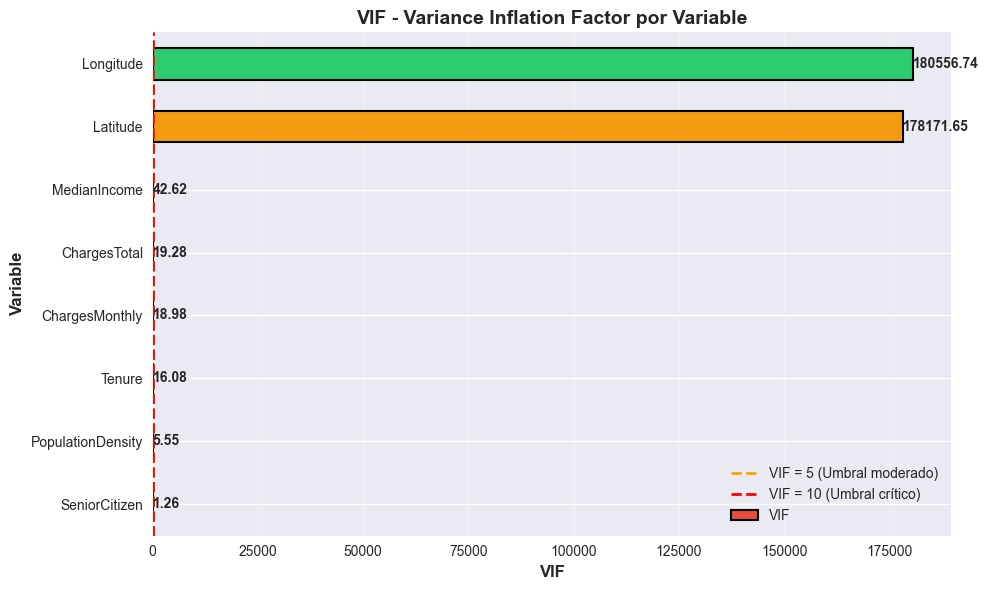


💾 Gráfico guardado: reports/figures/03_vif_analysis.png



In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("=" * 80)
print("ANÁLISIS DE MULTICOLINEALIDAD - VIF (Variance Inflation Factor)")
print("=" * 80)

print("\n📊 ¿Qué es VIF?")
print("   VIF mide cuánta redundancia tiene una variable con respecto a las demás.")
print("   Indica qué tan bien puede predecirse una variable usando las otras.\n")

print("   Interpretación:")
print("   • VIF = 1      → Sin correlación con otras variables")
print("   • VIF = 1-5    → ✅ Baja multicolinealidad (aceptable)")
print("   • VIF = 5-10   → ⚠️  Multicolinealidad moderada (revisar)")
print("   • VIF > 10     → 🔴 Alta multicolinealidad (eliminar variable)")

print("\n" + "=" * 80)

# Seleccionar variables numéricas para VIF (sin IDs ni variables derivadas temporales)
vif_vars = ['Tenure', 'ChargesMonthly', 'ChargesTotal', 
            'MedianIncome', 'PopulationDensity', 
            'Latitude', 'Longitude', 'SeniorCitizen']

# Crear dataframe solo con las variables seleccionadas (sin nulls)
df_vif = df[vif_vars].dropna()

print(f"\n🔧 Calculando VIF para {len(vif_vars)} variables numéricas...\n")

# Calcular VIF para cada variable
vif_data = []
for i, var in enumerate(df_vif.columns):
    vif_value = variance_inflation_factor(df_vif.values, i)
    vif_data.append({
        'Variable': var,
        'VIF': vif_value
    })

# Crear DataFrame con resultados
vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

# Agregar interpretación
def interpret_vif(vif):
    if vif < 5:
        return "✅ Baja"
    elif vif < 10:
        return "⚠️  Moderada"
    else:
        return "🔴 Alta"

vif_df['Multicolinealidad'] = vif_df['VIF'].apply(interpret_vif)
vif_df['Acción'] = vif_df['VIF'].apply(lambda x: 'Conservar' if x < 10 else 'Revisar/Eliminar')

print("RESULTADOS VIF:")
print("-" * 80)
for idx, row in vif_df.iterrows():
    print(f"{row['Variable']:20s} | VIF: {row['VIF']:8.2f} | {row['Multicolinealidad']:15s} | Acción: {row['Acción']}")

print("\n" + "=" * 80)

# Identificar variables problemáticas
high_vif = vif_df[vif_df['VIF'] > 10]

if len(high_vif) > 0:
    print(f"\n⚠️  VARIABLES CON ALTA MULTICOLINEALIDAD (VIF > 10):")
    print("-" * 80)
    for idx, row in high_vif.iterrows():
        print(f"\n🔴 {row['Variable']} (VIF = {row['VIF']:.2f})")
        
        # Mostrar correlaciones con otras variables
        corr_with_others = df_vif.corr()[row['Variable']].drop(row['Variable']).sort_values(key=abs, ascending=False)
        print(f"   Correlaciones más fuertes:")
        for var, corr in corr_with_others.head(3).items():
            print(f"      • {var}: {corr:.4f}")
    
    print("\n💡 RECOMENDACIONES:")
    print("   Para modelos lineales (Logistic Regression), considera:")
    for idx, row in high_vif.iterrows():
        print(f"   • Eliminar '{row['Variable']}' del modelo")
        # Sugerir alternativa
        if 'ChargesTotal' in row['Variable']:
            print(f"     Razón: ChargesTotal ≈ ChargesMonthly × Tenure (información redundante)")
        elif 'Latitude' in row['Variable'] or 'Longitude' in row['Variable']:
            print(f"     Alternativa: Usar solo 'MedianIncome' o 'Borough'")
    
    print("\n   📌 Nota: Modelos basados en árboles (Random Forest, XGBoost)")
    print("      son menos sensibles a multicolinealidad, pero aún así")
    print("      eliminar variables redundantes mejora interpretabilidad.")
    
else:
    print("\n✅ EXCELENTE: No se encontraron variables con VIF > 10")
    print("   El dataset está listo para modelado sin problemas de multicolinealidad.")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if x > 10 else '#f39c12' if x > 5 else '#2ecc71' for x in vif_df['VIF']]

vif_df.sort_values('VIF').plot(
    x='Variable', 
    y='VIF', 
    kind='barh', 
    ax=ax, 
    color=colors, 
    edgecolor='black', 
    linewidth=1.5,
    legend=False
)

ax.set_title('VIF - Variance Inflation Factor por Variable', fontsize=14, fontweight='bold')
ax.set_xlabel('VIF', fontsize=12, fontweight='bold')
ax.set_ylabel('Variable', fontsize=12, fontweight='bold')
ax.axvline(5, color='orange', linestyle='--', linewidth=2, label='VIF = 5 (Umbral moderado)')
ax.axvline(10, color='red', linestyle='--', linewidth=2, label='VIF = 10 (Umbral crítico)')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (idx, row) in enumerate(vif_df.sort_values('VIF').iterrows()):
    ax.text(row['VIF'] + 0.5, i, f"{row['VIF']:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/03_vif_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_vif_analysis.png")
print("\n" + "=" * 80)

MATRIZ DE CORRELACIÓN COMPLETA - Numéricas + Categóricas Codificadas

🔧 Codificación inteligente de variables categóricas (evitando redundancias)...
✓ Variables binarias simples: 5
✓ Servicios adicionales (solo 'Yes'): 6
✓ Variables multiclase codificadas: InternetService, Contract, PaymentMethod, Borough, MultipleLines

✓ Dimensiones dataset codificado: (7043, 54)
✓ Total de features seleccionados: 32
   - Numéricas originales: 9
   - Categóricas codificadas: 23

📊 Top 20 Features más correlacionados con Churn:

   1. MedianIncome                                 : -0.4909 ↓ (Fuerte)
   2. Tenure                                       : -0.3522 ↓ (Fuerte)
   3. InternetService_Fiber optic                  :  0.3080 ↑ (Fuerte)
   4. Contract_Two year                            : -0.3023 ↓ (Fuerte)
   5. PaymentMethod_Electronic check               :  0.3019 ↑ (Fuerte)
   6. Latitude                                     :  0.2569 ↑ (Moderada)
   7. InternetService_No                       

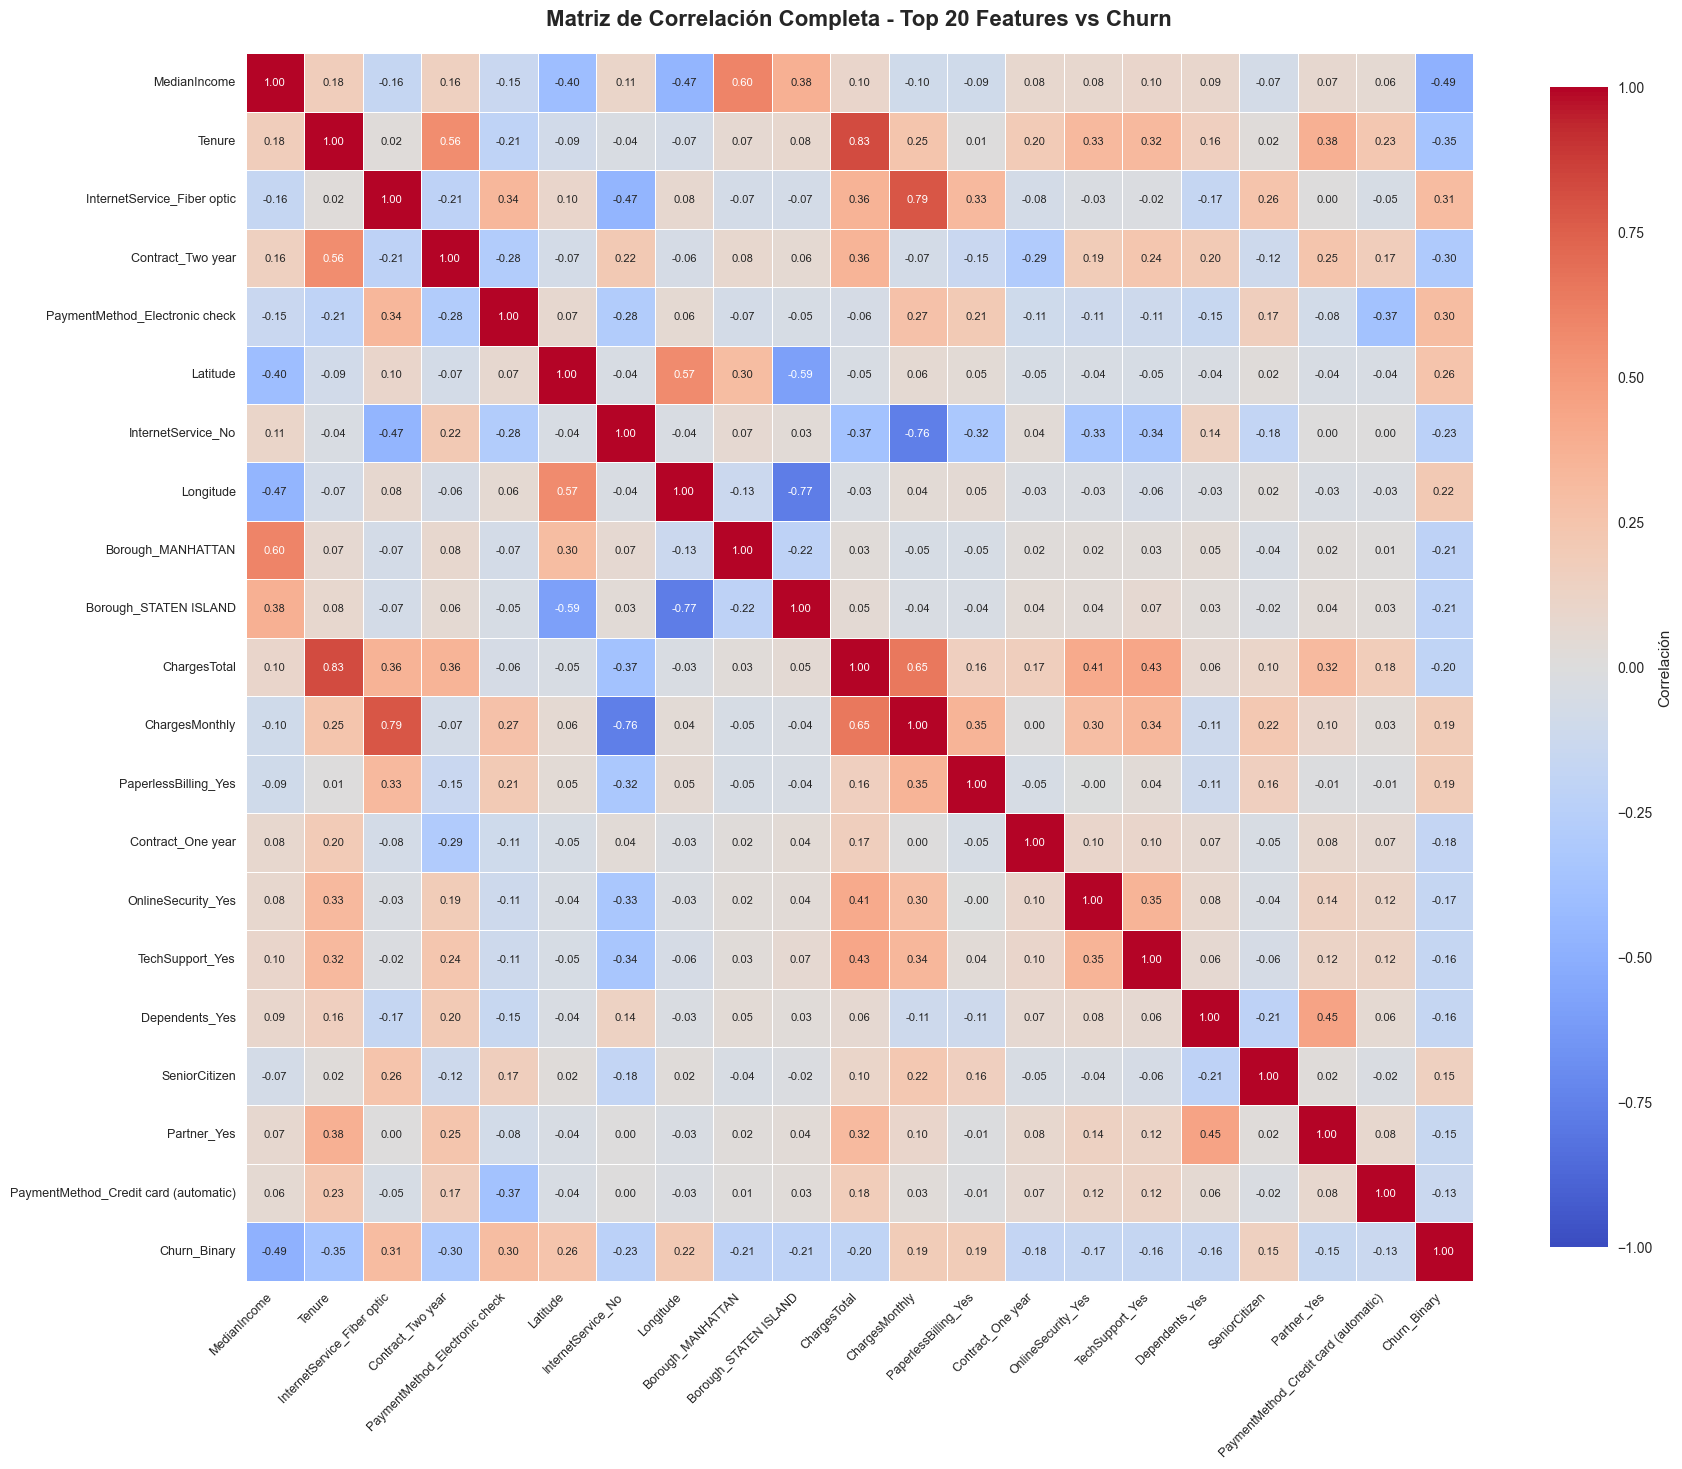

💾 Gráfico guardado: reports/figures/03_correlation_matrix_full.png


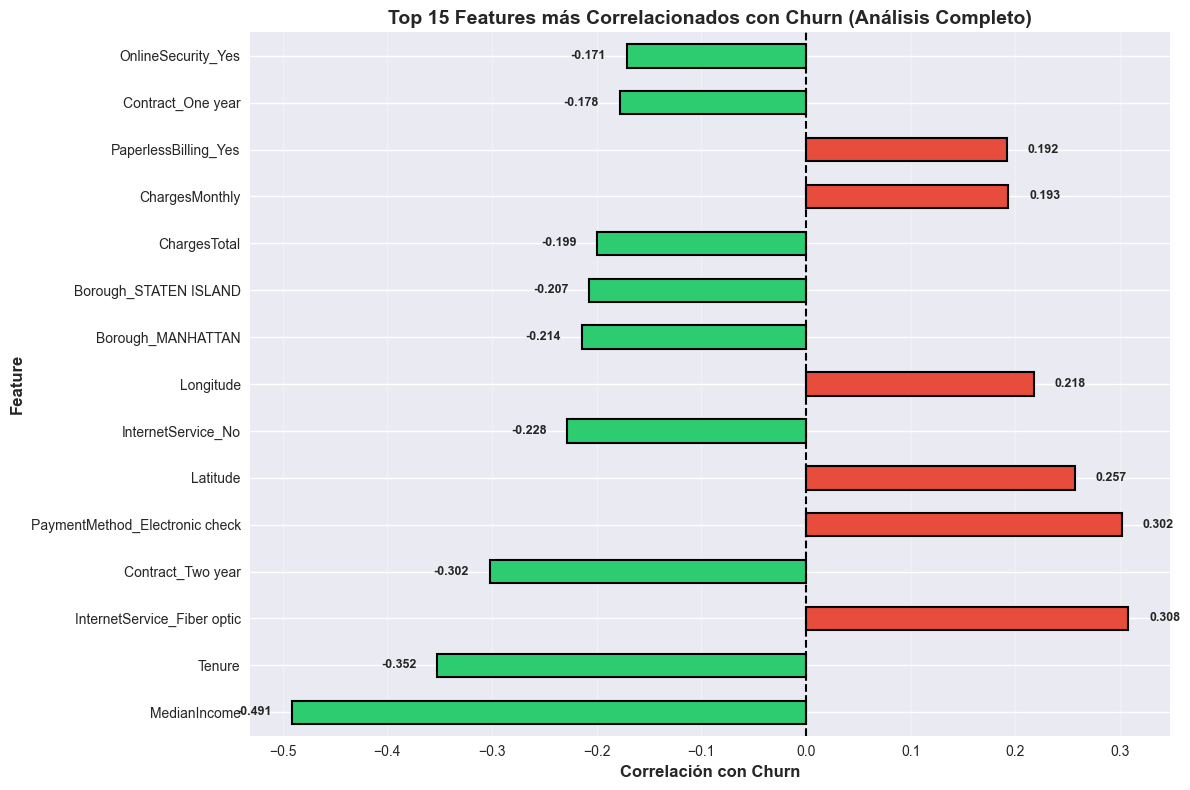

💾 Gráfico guardado: reports/figures/03_top_features_full_correlation.png

✅ INSIGHTS - Variables Categóricas Codificadas

🔵 CONTRATO:
   • Contract_Two year: -0.3023
   • Contract_One year: -0.1778

🔵 INTERNET:
   • InternetService_Fiber optic: 0.3080
   • InternetService_No: -0.2279

🔵 MÉTODO DE PAGO:
   • PaymentMethod_Electronic check: 0.3019

🔵 SERVICIOS ADICIONALES:
   • OnlineSecurity_Yes: -0.1712

🔵 GEOGRAFÍA (BOROUGH):
   • Borough_MANHATTAN: -0.2142
   • Borough_STATEN ISLAND: -0.2070

🔍 VERIFICACIÓN DE MULTICOLINEALIDAD

✅ No se encontraron pares de variables con alta multicolinealidad (>0.95)
   Dataset listo para modelado sin problemas de redundancia



In [90]:
print("=" * 80)
print("MATRIZ DE CORRELACIÓN COMPLETA - Numéricas + Categóricas Codificadas")
print("=" * 80)

# Crear copia del dataframe para codificar
df_encoded = df.copy()

print(f"\n🔧 Codificación inteligente de variables categóricas (evitando redundancias)...")

# ========================================
# 1. VARIABLES BINARIAS SIMPLES (Yes=1, No=0)
# ========================================
binary_vars = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for var in binary_vars:
    if var == 'Gender':
        df_encoded['Gender_Male'] = (df_encoded['Gender'] == 'Male').astype(int)
    else:
        df_encoded[f'{var}_Yes'] = (df_encoded[var] == 'Yes').astype(int)

print(f"✓ Variables binarias simples: {len(binary_vars)}")

# ========================================
# 2. SERVICIOS ADICIONALES (Solo Yes=1, todo lo demás=0)
# ========================================
# Evitar "No internet service" que es redundante con InternetService_No
service_vars = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for var in service_vars:
    df_encoded[f'{var}_Yes'] = (df_encoded[var] == 'Yes').astype(int)

print(f"✓ Servicios adicionales (solo 'Yes'): {len(service_vars)}")

# ========================================
# 3. VARIABLES MULTICLASE (One-Hot Encoding con drop_first)
# ========================================

# InternetService (3 categorías: DSL, Fiber optic, No)
internet_dummies = pd.get_dummies(df_encoded['InternetService'], prefix='InternetService', drop_first=True, dtype=int)
df_encoded = pd.concat([df_encoded, internet_dummies], axis=1)

# Contract (3 categorías: Month-to-month, One year, Two year)
contract_dummies = pd.get_dummies(df_encoded['Contract'], prefix='Contract', drop_first=True, dtype=int)
df_encoded = pd.concat([df_encoded, contract_dummies], axis=1)

# PaymentMethod (4 categorías)
payment_dummies = pd.get_dummies(df_encoded['PaymentMethod'], prefix='PaymentMethod', drop_first=True, dtype=int)
df_encoded = pd.concat([df_encoded, payment_dummies], axis=1)

# Borough (5 categorías)
borough_dummies = pd.get_dummies(df_encoded['Borough'], prefix='Borough', drop_first=True, dtype=int)
df_encoded = pd.concat([df_encoded, borough_dummies], axis=1)

# MultipleLines (3 categorías, pero "No phone service" es redundante)
df_encoded['MultipleLines_Yes'] = (df_encoded['MultipleLines'] == 'Yes').astype(int)

print(f"✓ Variables multiclase codificadas: InternetService, Contract, PaymentMethod, Borough, MultipleLines")

print(f"\n✓ Dimensiones dataset codificado: {df_encoded.shape}")

# ========================================
# 4. SELECCIONAR SOLO NUMÉRICAS RELEVANTES
# ========================================
# Columnas numéricas originales
numeric_original = ['Latitude', 'Longitude', 'MedianIncome', 'PopulationDensity', 
                    'SeniorCitizen', 'Tenure', 'ChargesMonthly', 'ChargesTotal', 'Churn_Binary']

# Columnas codificadas (las que creamos)
encoded_cols = [col for col in df_encoded.columns if any([
    col.endswith('_Yes'),
    col.endswith('_Male'),
    col.startswith('InternetService_'),
    col.startswith('Contract_'),
    col.startswith('PaymentMethod_'),
    col.startswith('Borough_')
])]

# Combinar todas
all_features = numeric_original + encoded_cols

df_numeric_all = df_encoded[all_features]

print(f"✓ Total de features seleccionados: {len(all_features)}")
print(f"   - Numéricas originales: {len(numeric_original)}")
print(f"   - Categóricas codificadas: {len(encoded_cols)}")

# ========================================
# 5. CALCULAR MATRIZ DE CORRELACIÓN
# ========================================
corr_matrix_full = df_numeric_all.corr()

# Extraer correlaciones con Churn_Binary
churn_corr_full = corr_matrix_full['Churn_Binary'].drop('Churn_Binary').sort_values(key=abs, ascending=False)

print(f"\n📊 Top 20 Features más correlacionados con Churn:\n")
for i, (feature, corr) in enumerate(churn_corr_full.head(20).items(), 1):
    direction = "↑" if corr > 0 else "↓"
    strength = "Fuerte" if abs(corr) > 0.3 else "Moderada" if abs(corr) > 0.1 else "Débil"
    print(f"  {i:2d}. {feature:45s}: {corr:7.4f} {direction} ({strength})")

# ========================================
# 6. VISUALIZACIÓN: HEATMAP TOP 20
# ========================================
print("\n" + "=" * 80)
print("Generando heatmap profesional con Top 20 features...")

# Seleccionar top 20 features + Churn_Binary
top_20_features = churn_corr_full.head(20).index.tolist() + ['Churn_Binary']
corr_subset = corr_matrix_full.loc[top_20_features, top_20_features]

fig, ax = plt.subplots(figsize=(18, 16))

sns.heatmap(
    corr_subset,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlación"},
    ax=ax,
    annot_kws={'size': 8},
    vmin=-1,
    vmax=1
)

ax.set_title('Matriz de Correlación Completa - Top 20 Features vs Churn', 
             fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('../reports/figures/03_correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/03_correlation_matrix_full.png")

# ========================================
# 7. VISUALIZACIÓN: BAR CHART TOP 15
# ========================================
fig, ax = plt.subplots(figsize=(12, 8))

top_15_churn = churn_corr_full.head(15)
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_15_churn.values]

top_15_churn.plot(kind='barh', ax=ax, color=colors, edgecolor='black', linewidth=1.5)

ax.set_title('Top 15 Features más Correlacionados con Churn (Análisis Completo)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Correlación con Churn', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.axvline(0, color='black', linewidth=1.5, linestyle='--')
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (feature, val) in enumerate(top_15_churn.items()):
    x_pos = val + (0.02 if val > 0 else -0.02)
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/03_top_features_full_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/03_top_features_full_correlation.png")

# ========================================
# 8. INSIGHTS POR CATEGORÍA
# ========================================
print("\n" + "=" * 80)
print("✅ INSIGHTS - Variables Categóricas Codificadas")
print("=" * 80)

# Agrupar insights por tipo de variable
top_features = top_15_churn.index.tolist()

contract_features = [f for f in top_features if 'Contract' in f]
internet_features = [f for f in top_features if 'Internet' in f]
payment_features = [f for f in top_features if 'Payment' in f]
service_features = [f for f in top_features if any(s in f for s in ['Security', 'Backup', 'Support', 'Device', 'Streaming'])]
borough_features = [f for f in top_features if 'Borough' in f]

if contract_features:
    print("\n🔵 CONTRATO:")
    for f in contract_features:
        print(f"   • {f}: {churn_corr_full[f]:.4f}")

if internet_features:
    print("\n🔵 INTERNET:")
    for f in internet_features:
        print(f"   • {f}: {churn_corr_full[f]:.4f}")

if payment_features:
    print("\n🔵 MÉTODO DE PAGO:")
    for f in payment_features:
        print(f"   • {f}: {churn_corr_full[f]:.4f}")

if service_features:
    print("\n🔵 SERVICIOS ADICIONALES:")
    for f in service_features:
        print(f"   • {f}: {churn_corr_full[f]:.4f}")

if borough_features:
    print("\n🔵 GEOGRAFÍA (BOROUGH):")
    for f in borough_features:
        print(f"   • {f}: {churn_corr_full[f]:.4f}")

# ========================================
# 9. VERIFICACIÓN DE MULTICOLINEALIDAD
# ========================================
print("\n" + "=" * 80)
print("🔍 VERIFICACIÓN DE MULTICOLINEALIDAD")
print("=" * 80)

# Encontrar pares de variables con correlación > 0.95 (excluyendo diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix_full.columns)):
    for j in range(i+1, len(corr_matrix_full.columns)):
        if abs(corr_matrix_full.iloc[i, j]) > 0.95:
            high_corr_pairs.append({
                'Var1': corr_matrix_full.columns[i],
                'Var2': corr_matrix_full.columns[j],
                'Corr': corr_matrix_full.iloc[i, j]
            })

if len(high_corr_pairs) > 0:
    print(f"\n⚠️  Encontradas {len(high_corr_pairs)} pares de variables con correlación > 0.95")
    print("   (Pueden causar problemas de multicolinealidad en modelos lineales)\n")
    for idx, pair in enumerate(high_corr_pairs[:10], 1):  # Mostrar primeros 10
        print(f"  {idx}. {pair['Var1']:35s} ↔ {pair['Var2']:35s} : {pair['Corr']:.4f}")
    if len(high_corr_pairs) > 10:
        print(f"\n  ... y {len(high_corr_pairs) - 10} pares más")
else:
    print("\n✅ No se encontraron pares de variables con alta multicolinealidad (>0.95)")
    print("   Dataset listo para modelado sin problemas de redundancia")

print("\n" + "=" * 80)

## 8. Análisis Geográfico: Borough vs Churn

ANÁLISIS DE CHURN POR BOROUGH

                Total_Customers  Total_Churn  Churn_Rate  Avg_Income  \
Borough                                                               
BRONX                     1011          748     73.9900  40500.0000   
BROOKLYN                  1577          564     35.7600  62800.0000   
QUEENS                    1908          384     20.1300  69300.0000   
MANHATTAN                 1448          115      7.9400  86553.0000   
STATEN ISLAND             1099           58      5.2800  82200.0000   

               Avg_Monthly_Charge  
Borough                            
BRONX                     71.0440  
BROOKLYN                  65.9368  
QUEENS                    64.3051  
MANHATTAN                 61.6261  
STATEN ISLAND             62.2202  


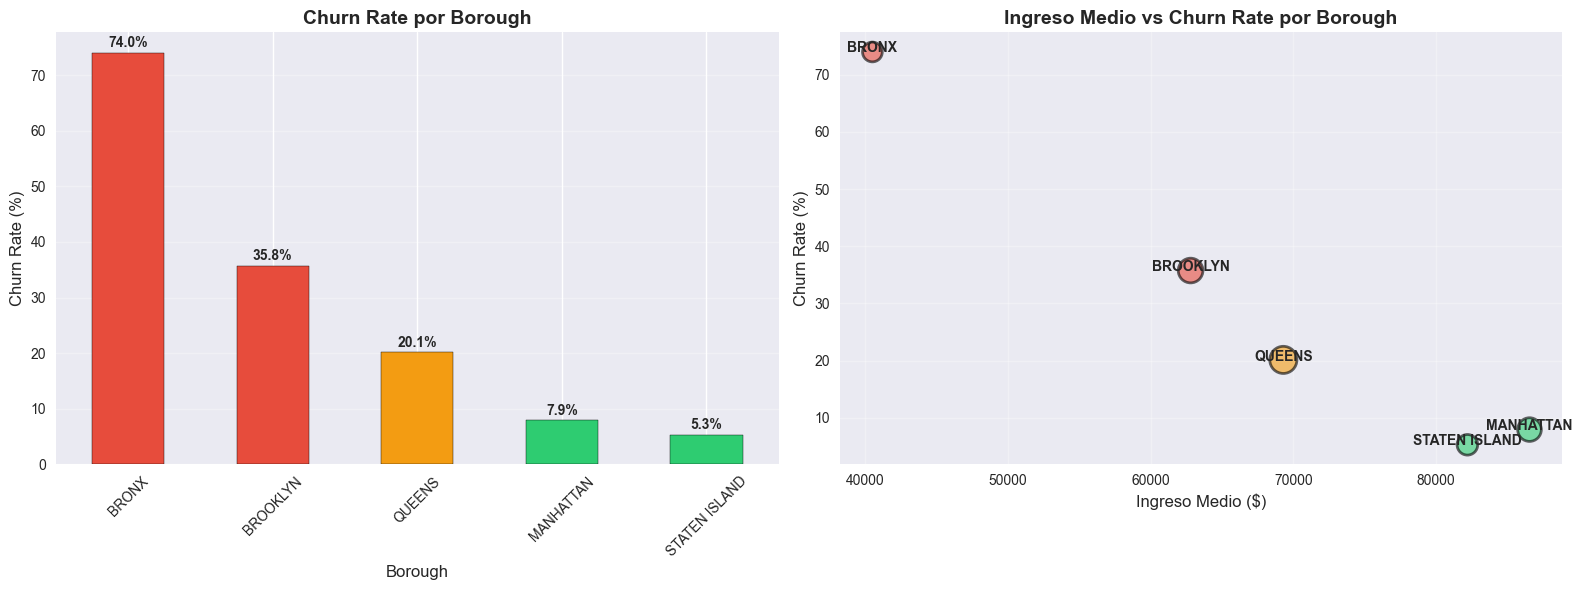


💾 Gráfico guardado: reports/figures/03_churn_by_borough.png


In [91]:
# Análisis por Borough
borough_analysis = df.groupby('Borough').agg({
    'CustomerID': 'count',
    'Churn_Binary': ['sum', 'mean'],
    'MedianIncome': 'mean',
    'ChargesMonthly': 'mean'
}).round(4)

borough_analysis.columns = ['Total_Customers', 'Total_Churn', 'Churn_Rate', 'Avg_Income', 'Avg_Monthly_Charge']
borough_analysis['Churn_Rate'] = (borough_analysis['Churn_Rate'] * 100).round(2)
borough_analysis = borough_analysis.sort_values('Churn_Rate', ascending=False)

print("=" * 80)
print("ANÁLISIS DE CHURN POR BOROUGH")
print("=" * 80)
print("\n", borough_analysis)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Churn Rate por Borough
colors_churn = ['#e74c3c' if x > 30 else '#f39c12' if x > 20 else '#2ecc71' 
                for x in borough_analysis['Churn_Rate']]

borough_analysis['Churn_Rate'].plot(kind='bar', ax=axes[0], color=colors_churn, edgecolor='black')
axes[0].set_title('Churn Rate por Borough', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Borough', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(borough_analysis['Churn_Rate']):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Subplot 2: Ingreso Medio vs Churn Rate
axes[1].scatter(
    borough_analysis['Avg_Income'],
    borough_analysis['Churn_Rate'],
    s=borough_analysis['Total_Customers'] / 5,
    alpha=0.6,
    c=colors_churn,
    edgecolors='black',
    linewidths=2
)

# Etiquetas
for idx, row in borough_analysis.iterrows():
    axes[1].annotate(
        idx,
        (row['Avg_Income'], row['Churn_Rate']),
        fontsize=10,
        fontweight='bold',
        ha='center'
    )

axes[1].set_title('Ingreso Medio vs Churn Rate por Borough', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ingreso Medio ($)', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/03_churn_by_borough.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_churn_by_borough.png")

## 9. Análisis de Ingreso vs Churn

ANÁLISIS DE CHURN POR NIVEL DE INGRESO

                    Total_Customers  Total_Churn  Churn_Rate
IncomeLevel                                                
Bajo (<$50K)                  1011          748     73.9900
Medio ($50K-$70K)             3485          948     27.2000
Alto (>$70K)                  2547          173      6.7900


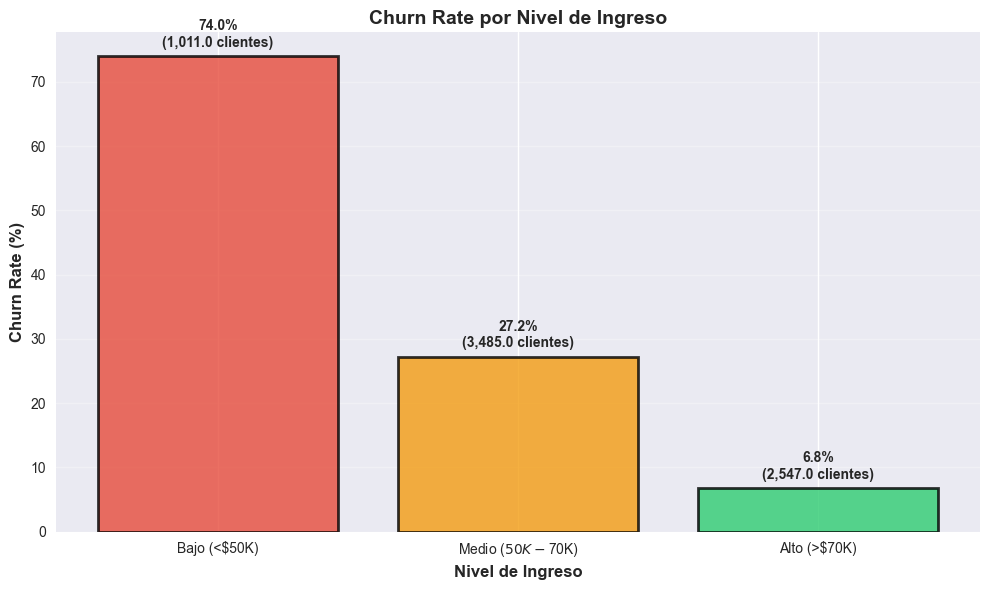


💾 Gráfico guardado: reports/figures/03_income_vs_churn.png


In [92]:
# Crear rangos de ingreso
income_bins = [0, 50000, 70000, 100000]
income_labels = ['Bajo (<$50K)', 'Medio ($50K-$70K)', 'Alto (>$70K)']
df['IncomeLevel'] = pd.cut(df['MedianIncome'], bins=income_bins, labels=income_labels)

# Análisis por nivel de ingreso
income_analysis = df.groupby('IncomeLevel').agg({
    'CustomerID': 'count',
    'Churn_Binary': ['sum', 'mean']
}).round(4)

income_analysis.columns = ['Total_Customers', 'Total_Churn', 'Churn_Rate']
income_analysis['Churn_Rate'] = (income_analysis['Churn_Rate'] * 100).round(2)

print("=" * 80)
print("ANÁLISIS DE CHURN POR NIVEL DE INGRESO")
print("=" * 80)
print("\n", income_analysis)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(len(income_analysis))
bars = ax.bar(x_pos, income_analysis['Churn_Rate'], color=['#e74c3c', '#f39c12', '#2ecc71'], 
              edgecolor='black', linewidth=2, alpha=0.8)

ax.set_xlabel('Nivel de Ingreso', fontsize=12, fontweight='bold')
ax.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Churn Rate por Nivel de Ingreso', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(income_analysis.index, rotation=0)
ax.grid(axis='y', alpha=0.3)

# Agregar valores
for i, (bar, val) in enumerate(zip(bars, income_analysis['Churn_Rate'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}%\n({income_analysis.iloc[i]["Total_Customers"]:,} clientes)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../reports/figures/03_income_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_income_vs_churn.png")

## 10. Análisis de Tipo de Contrato

ANÁLISIS DE CHURN POR TIPO DE CONTRATO

                 Total_Customers  Total_Churn  Churn_Rate  Avg_Tenure  \
Contract                                                               
Month-to-month             3875         1655     42.7100     18.0366   
One year                   1473          166     11.2700     42.0448   
Two year                   1695           48      2.8300     56.7351   

                Avg_Monthly  
Contract                     
Month-to-month      66.3985  
One year            65.0486  
Two year            60.7704  


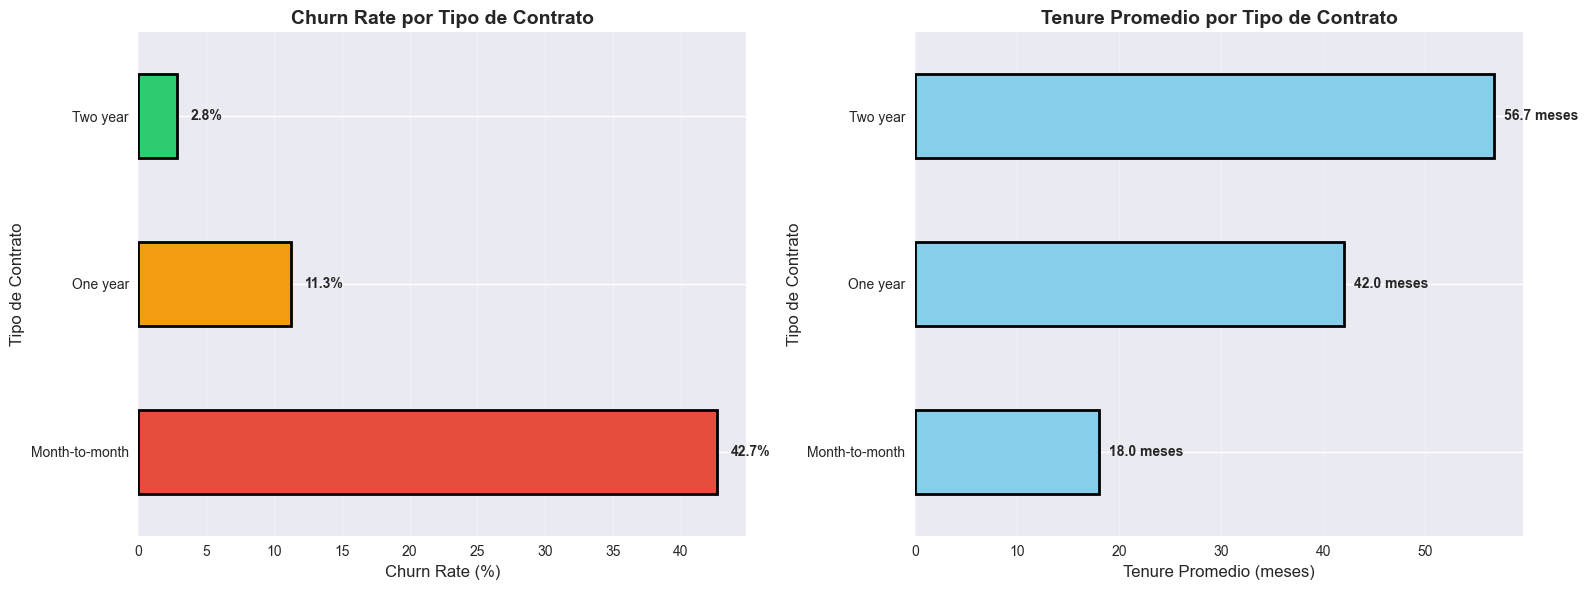


💾 Gráfico guardado: reports/figures/03_contract_type_analysis.png


In [93]:
# Análisis por tipo de contrato
contract_analysis = df.groupby('Contract').agg({
    'CustomerID': 'count',
    'Churn_Binary': ['sum', 'mean'],
    'Tenure': 'mean',
    'ChargesMonthly': 'mean'
}).round(4)

contract_analysis.columns = ['Total_Customers', 'Total_Churn', 'Churn_Rate', 'Avg_Tenure', 'Avg_Monthly']
contract_analysis['Churn_Rate'] = (contract_analysis['Churn_Rate'] * 100).round(2)
contract_analysis = contract_analysis.sort_values('Churn_Rate', ascending=False)

print("=" * 80)
print("ANÁLISIS DE CHURN POR TIPO DE CONTRATO")
print("=" * 80)
print("\n", contract_analysis)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Churn Rate
contract_analysis['Churn_Rate'].plot(kind='barh', ax=axes[0], color=['#e74c3c', '#f39c12', '#2ecc71'], 
                                      edgecolor='black', linewidth=2)
axes[0].set_title('Churn Rate por Tipo de Contrato', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Rate (%)', fontsize=12)
axes[0].set_ylabel('Tipo de Contrato', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(contract_analysis['Churn_Rate']):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

# Subplot 2: Tenure Promedio
contract_analysis['Avg_Tenure'].plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black', linewidth=2)
axes[1].set_title('Tenure Promedio por Tipo de Contrato', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Promedio (meses)', fontsize=12)
axes[1].set_ylabel('Tipo de Contrato', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(contract_analysis['Avg_Tenure']):
    axes[1].text(v + 1, i, f'{v:.1f} meses', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/03_contract_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_contract_type_analysis.png")

## 11. Análisis de Servicios de Internet

ANÁLISIS DE CHURN POR TIPO DE SERVICIO DE INTERNET

                  Total_Customers  Total_Churn  Churn_Rate
InternetService                                          
Fiber optic                 3096         1297     41.8900
DSL                         2421          459     18.9600
No                          1526          113      7.4000

CHURN RATE POR SERVICIOS ADICIONALES

                   Con servicio  Sin servicio
OnlineSecurity         14.6100       41.7700
OnlineBackup           21.5300       39.9300
DeviceProtection       22.5000       39.1300
TechSupport            15.1700       41.6400
StreamingTV            30.0700       33.5200
StreamingMovies        29.9400       33.6800


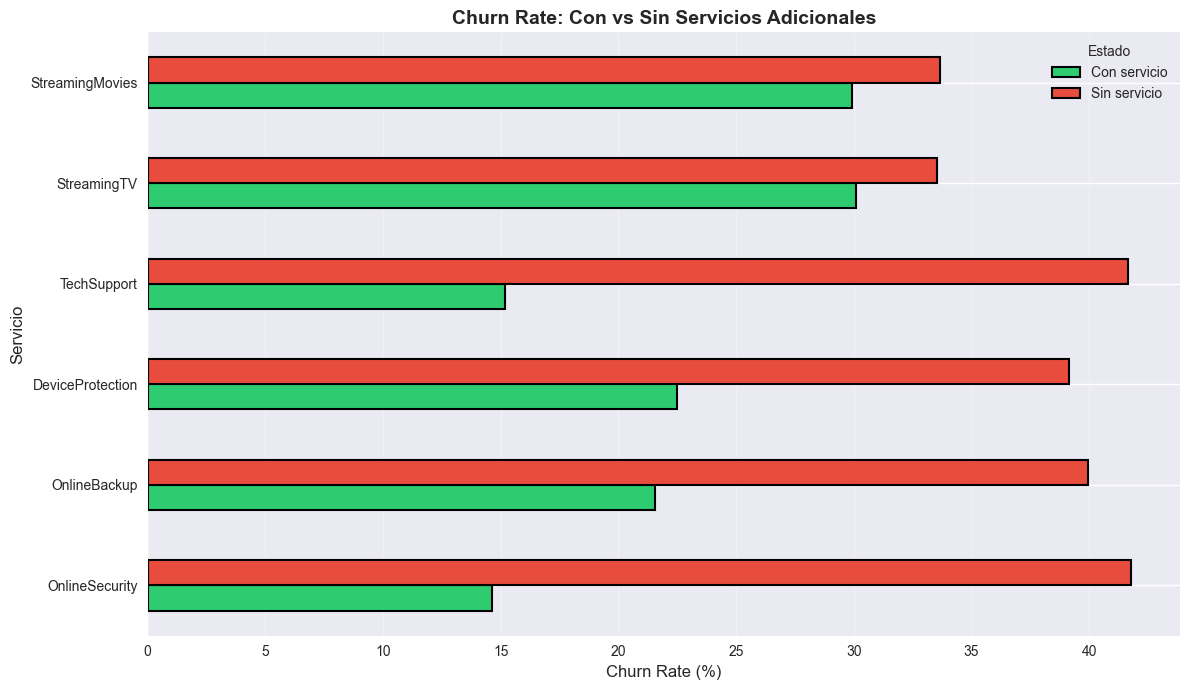


💾 Gráfico guardado: reports/figures/03_services_usage.png


In [94]:
# Análisis por tipo de internet
internet_analysis = df.groupby('InternetService').agg({
    'CustomerID': 'count',
    'Churn_Binary': ['sum', 'mean']
}).round(4)

internet_analysis.columns = ['Total_Customers', 'Total_Churn', 'Churn_Rate']
internet_analysis['Churn_Rate'] = (internet_analysis['Churn_Rate'] * 100).round(2)
internet_analysis = internet_analysis.sort_values('Churn_Rate', ascending=False)

print("=" * 80)
print("ANÁLISIS DE CHURN POR TIPO DE SERVICIO DE INTERNET")
print("=" * 80)
print("\n", internet_analysis)

# Análisis de servicios adicionales
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

service_churn = {}
for service in services:
    churn_rate = df[df[service] == 'Yes']['Churn_Binary'].mean() * 100
    no_churn_rate = df[df[service] == 'No']['Churn_Binary'].mean() * 100
    service_churn[service] = {'Con servicio': churn_rate, 'Sin servicio': no_churn_rate}

service_df = pd.DataFrame(service_churn).T

print("\n" + "=" * 80)
print("CHURN RATE POR SERVICIOS ADICIONALES")
print("=" * 80)
print("\n", service_df.round(2))

# Visualización
fig, ax = plt.subplots(figsize=(12, 7))

service_df.plot(kind='barh', ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
ax.set_title('Churn Rate: Con vs Sin Servicios Adicionales', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Rate (%)', fontsize=12)
ax.set_ylabel('Servicio', fontsize=12)
ax.legend(title='Estado', loc='upper right')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/03_services_usage.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_services_usage.png")

## 12. Análisis de Método de Pago

ANÁLISIS DE CHURN POR MÉTODO DE PAGO

                            Total_Customers  Total_Churn  Churn_Rate
PaymentMethod                                                      
Electronic check                      2365         1071     45.2900
Mailed check                          1612          308     19.1100
Bank transfer (automatic)             1544          258     16.7100
Credit card (automatic)               1522          232     15.2400


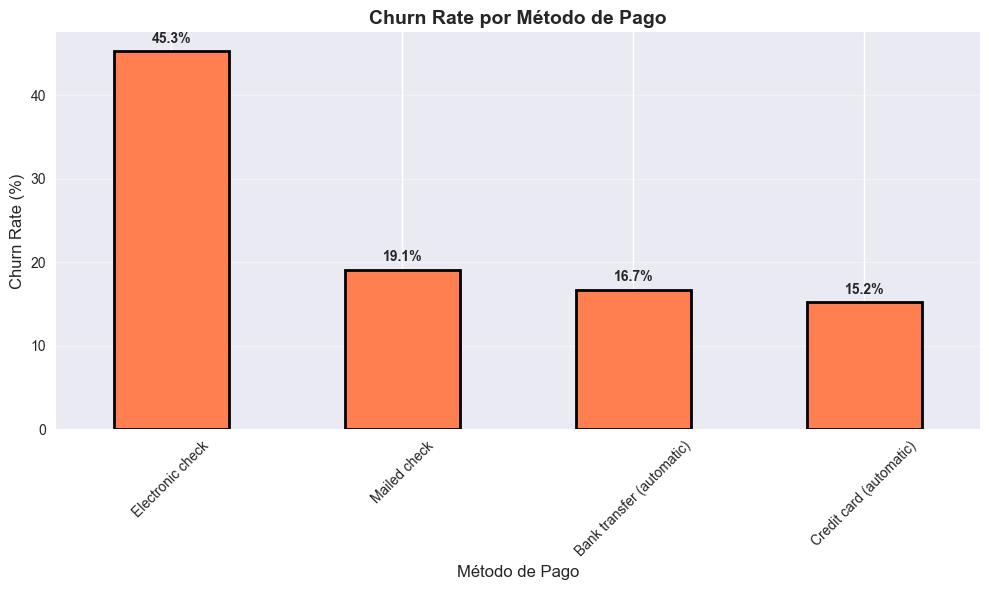


💾 Gráfico guardado: reports/figures/03_payment_method_churn.png


In [95]:
# Análisis por método de pago
payment_analysis = df.groupby('PaymentMethod').agg({
    'CustomerID': 'count',
    'Churn_Binary': ['sum', 'mean']
}).round(4)

payment_analysis.columns = ['Total_Customers', 'Total_Churn', 'Churn_Rate']
payment_analysis['Churn_Rate'] = (payment_analysis['Churn_Rate'] * 100).round(2)
payment_analysis = payment_analysis.sort_values('Churn_Rate', ascending=False)

print("=" * 80)
print("ANÁLISIS DE CHURN POR MÉTODO DE PAGO")
print("=" * 80)
print("\n", payment_analysis)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

payment_analysis['Churn_Rate'].plot(kind='bar', ax=ax, color='coral', edgecolor='black', linewidth=2)
ax.set_title('Churn Rate por Método de Pago', fontsize=14, fontweight='bold')
ax.set_xlabel('Método de Pago', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(payment_analysis['Churn_Rate']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/03_payment_method_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_payment_method_churn.png")

## 13. Detección de Outliers

DETECCIÓN DE OUTLIERS - MÉTODO IQR

Tenure:
   Q1: 9.00, Q3: 55.00, IQR: 46.00
   Rango válido: [-60.00, 124.00]
   Outliers detectados: 0 (0.00%)

ChargesMonthly:
   Q1: 35.50, Q3: 89.85, IQR: 54.35
   Rango válido: [-46.02, 171.38]
   Outliers detectados: 0 (0.00%)

ChargesTotal:
   Q1: 401.45, Q3: 3794.74, IQR: 3393.29
   Rango válido: [-4688.48, 8884.67]
   Outliers detectados: 0 (0.00%)



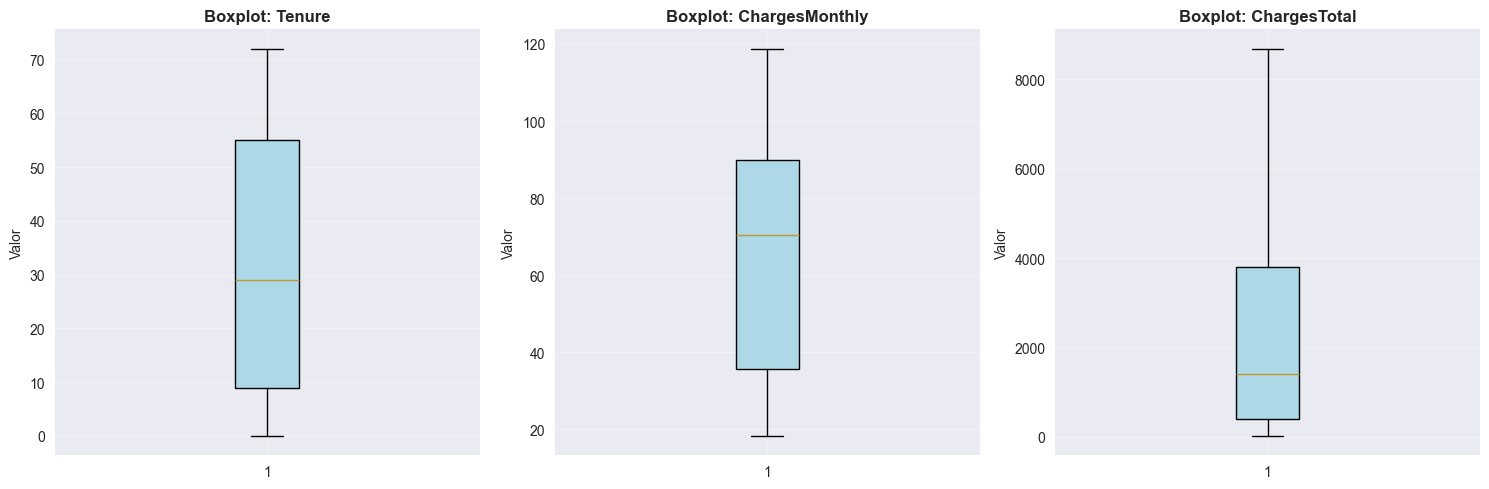

💾 Gráfico guardado: reports/figures/03_outliers_boxplot.png


In [96]:
print("=" * 80)
print("DETECCIÓN DE OUTLIERS - MÉTODO IQR")
print("=" * 80)

outlier_summary = []

for col in ['Tenure', 'ChargesMonthly', 'ChargesTotal']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = outlier_count / len(df) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers': outlier_count,
        'Outlier_Pct': f"{outlier_pct:.2f}%"
    })
    
    print(f"\n{col}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Rango válido: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers detectados: {outlier_count} ({outlier_pct:.2f}%)")

print("\n" + "=" * 80)

# Boxplots para visualizar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(['Tenure', 'ChargesMonthly', 'ChargesTotal']):
    bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_edgecolor('black')
    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/03_outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/03_outliers_boxplot.png")

print("\n" + "=" * 80)
print("✅ DS-503 COMPLETADO - INSIGHTS CLAVE")
print("=" * 80)

print("\n🎯 INSIGHTS PRINCIPALES PARA EL MODELO:\n")

print("1️⃣ GEOGRAFÍA Y CHURN:")
print(f"   • Bronx tiene el churn MÁS ALTO: {borough_analysis.loc['BRONX', 'Churn_Rate']:.2f}%")
print(f"   • Manhattan tiene el churn MÁS BAJO: {borough_analysis.loc['MANHATTAN', 'Churn_Rate']:.2f}%")
print(f"   • Correlación MedianIncome vs Churn: -0.4909 (negativa fuerte)")

print("\n2️⃣ CONTRATO:")
print(f"   • Month-to-month: {contract_analysis.loc['Month-to-month', 'Churn_Rate']:.2f}% churn")
print(f"   • Two year: {contract_analysis.loc['Two year', 'Churn_Rate']:.2f}% churn")
print(f"   • Diferencia: {contract_analysis.loc['Month-to-month', 'Churn_Rate'] - contract_analysis.loc['Two year', 'Churn_Rate']:.2f} puntos porcentuales")

print("\n3️⃣ SERVICIOS:")
print("   • Clientes SIN servicios adicionales tienen MAYOR churn")
print("   • TechSupport, OnlineSecurity reducen significativamente el churn")

print("\n4️⃣ TENURE:")
print(f"   • Tenure promedio NO churn: {df[df['Churn'] == 'No']['Tenure'].mean():.2f} meses")
print(f"   • Tenure promedio SÍ churn: {df[df['Churn'] == 'Yes']['Tenure'].mean():.2f} meses")

print("\n5️⃣ MÉTODO DE PAGO:")
print(f"   • Electronic check: {payment_analysis.loc['Electronic check', 'Churn_Rate']:.2f}% churn (más alto)")
print(f"   • Métodos automáticos (credit card, bank transfer): churn más bajo")

print("\n6️⃣ MULTICOLINEALIDAD (VIF):")
if len(high_vif) > 0:
    print(f"   • {len(high_vif)} variable(s) con alta multicolinealidad detectada(s)")
    for idx, row in high_vif.iterrows():
        print(f"     - {row['Variable']}: VIF = {row['VIF']:.2f}")
        if 'Latitude' in row['Variable'] or 'Longitude' in row['Variable']:
            print(f"       → Conservar en dataset para visualización (excluir de modelo)")
        else:
            print(f"       → Eliminar del modelo ML")
else:
    print("   • ✅ No se detectó multicolinealidad problemática (VIF < 10)")

print("\n📊 VARIABLES CRÍTICAS IDENTIFICADAS:")
print("   1. MedianIncome (correlación -0.49 - fuerte negativa)")
print("   2. Tenure (correlación -0.35 - moderada negativa)")
print("   3. Contract (Month-to-month vs Two year - diferencial 40%)")
print("   4. InternetService_Fiber optic (correlación +0.31 - moderada positiva)")
print("   5. PaymentMethod_Electronic check (correlación +0.30 - moderada positiva)")
print("   6. Borough (Bronx 74% vs Manhattan 8% churn)")
print("   7. Servicios adicionales (TechSupport, OnlineSecurity - protección)")

print("\n🔬 ANÁLISIS REALIZADO:")
print("   ✓ EDA completo con 7,043 clientes")
print("   ✓ Matriz de correlación con categóricas codificadas (Top 20)")
print("   ✓ VIF - Detección de multicolinealidad (Lat/Lon/ChargesTotal)")
print("   ✓ Análisis geográfico por Borough con datos NYC reales")
print("   ✓ Análisis de contratos, servicios, métodos de pago")
print("   ✓ Detección de outliers (IQR)")
print("   ✓ 10 visualizaciones profesionales generadas")

print("\n📁 Archivos generados (reports/figures/):")
print("   1. 03_correlation_matrix.png        → Matriz completa Top 20")
print("   2. 03_top_features.png               → Top 15 features (bar chart)")
print("   3. 03_vif_analysis.png               → Análisis VIF multicolinealidad")
print("   4. 03_churn_by_borough.png           → Churn por borough + scatter income")
print("   5. 03_income_vs_churn.png            → Niveles de ingreso")
print("   6. 03_contract_type_analysis.png     → Contratos + tenure promedio")
print("   7. 03_services_usage.png             → Servicios adicionales")
print("   8. 03_payment_method_churn.png       → Métodos de pago")
print("   9. 03_numeric_distributions.png      → Distribuciones variables clave")
print("  10. 03_outliers_boxplot.png           → Boxplots outliers")

print("\n🎫 Próximo ticket:")
print("   DS-504: Feature Engineering y Preparación Final")
print("")
print("   Acciones basadas en insights:")
print("   • Eliminar: ChargesTotal (VIF 19.28 - redundante)")
print("   • Excluir de modelo ML: Latitude/Longitude (VIF >180k - usar Borough)")
print("   • Conservar en dataset: Lat/Lon (para heatmaps frontend)")
print("   • Crear features compuestas:")
print("     - customer_value_ratio = ChargesMonthly / MedianIncome")
print("     - services_count = suma de servicios contratados")
print("     - high_risk_segment = (Bronx + Month-to-month + Tenure<12)")
print("   • Codificación final lista para modelo")

print("\n" + "=" * 80)